First thing first , we import our libraries and dataset 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [2]:
data = pd.read_csv("data\kc_house_data.csv")

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
#Viewing columns
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
#overview of the data and it data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
#Converting dates into datetime objects for easy manipulation
data['date'] = pd.to_datetime(data['date'])

In [8]:
#Checking for deplicates
data.duplicated().value_counts()

False    21597
dtype: int64

In [9]:
#dealing with missing values
data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [10]:
data['sqft_basement'] = data['sqft_basement'].apply(lambda x: float(x.split()[0].replace('?', '0')))


In [11]:
data['sqft_basement'].astype(int)

0          0
1        400
2          0
3        910
4          0
        ... 
21592      0
21593      0
21594      0
21595      0
21596      0
Name: sqft_basement, Length: 21597, dtype: int32

In [12]:
data['yr_renovated'] = data['yr_renovated'].fillna(0)
data['waterfront']= data['waterfront'].fillna(0)
data['sqft_basement'] = data['sqft_basement'].fillna(0)
data['view'] = data['view'].fillna(0)

In [13]:
#Creating a dataframe with only the position coordinates for home in the data
location_data = data[['price','lat','long']]
location_data.head()

,price,lat,long
0,221900.0,47.5112,-122.257
1,538000.0,47.7210,-122.319
2,180000.0,47.7379,-122.233
3,604000.0,47.5208,-122.393
4,510000.0,47.6168,-122.045


In [14]:
location_data.to_excel(r'Data\lcoation2.xlsx', index=False)

### EDA

What can we infer from the above describe function ?

Look at the bedroom columns , the dataset has a house where the house has 33 bedrooms , seems to be a massive house and would be interesting to know more about it as we progress.
Maximum square feet is 13,450 where as the minimum is 290. we can see that the data is distributed.

In [83]:
data.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.0,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,0.0,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,...,7.657915,1788.596842,285.716581,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,0.0,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,...,1.173200,827.759761,439.819830,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,0.0,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,...,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,0.0,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,0.0,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,0.0,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,0.0,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


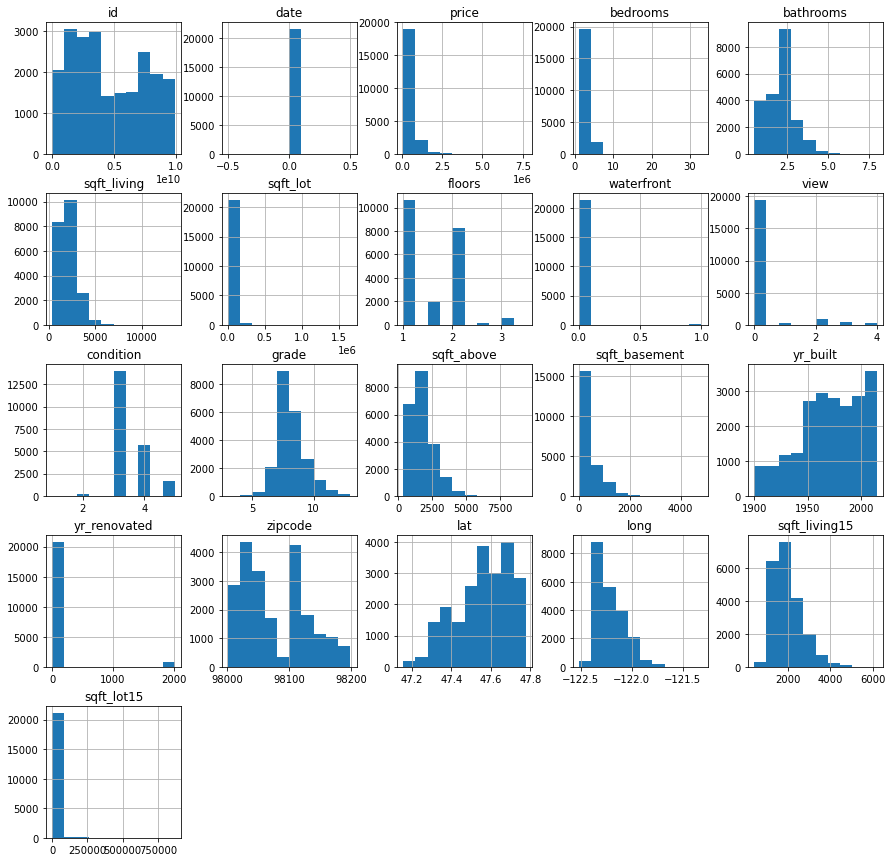

In [82]:
# Checking for normality
data.hist(figsize=(15,15));

## Data distributions

Which is the most common house (Bedroom wise)

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

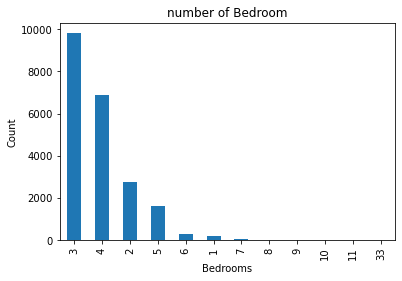

In [15]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

As we can see from the visualization 3 bedroom houses are most commonly sold followed by 4 bedroom. So how is it useful ? 
For a builder having this data , He can make a new building with more 3 and 4 bedroom’s to attract more buyers.

Information from location 

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

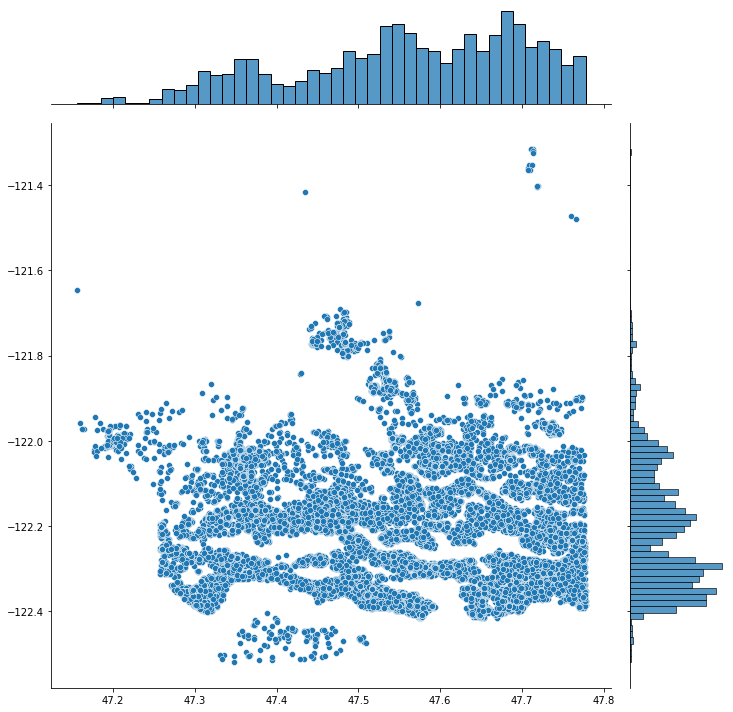

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [16]:
plt.figure(figsize=(10,10))
sns.jointplot(x=data.lat.values, y=data.long.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
# plt1 = plt()
sns.despine

Let us see what we can infer from this visualization.
For latitude between 47.7 and 48.8 there are many houses , which would mean that maybe it’s an ideal location isn’t it ? 
But when we talk about longitude we can see that concentration is high between -122.2 to -122.4. 
Which would mean that most of the buy’s has been for this particular location.

Factors affecting the price

In [87]:
#Creating and viewing the correlation map 
corrmat = data.corr
corrmat()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,NaN,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.003599,0.011772,...,0.008188,-0.010799,-0.004359,0.021617,-0.010612,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,-0.016772,NaN,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,...,0.667951,0.605368,0.321108,0.053953,0.117855,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,NaN,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,...,0.356563,0.479386,0.297229,0.155670,0.017900,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,NaN,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,...,0.665838,0.686668,0.278485,0.507173,0.047177,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,NaN,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,...,0.762779,0.876448,0.428660,0.318152,0.051060,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,NaN,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,...,0.114731,0.184139,0.015031,0.052946,0.004979,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,NaN,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,...,0.458794,0.523989,-0.241866,0.489193,0.003793,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.003599,NaN,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,...,0.082818,0.071778,0.083050,-0.024487,0.073939,0.028923,-0.012157,-0.037628,0.083823,0.030658
view,0.011772,NaN,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,...,0.249082,0.166017,0.270629,-0.054452,0.090339,0.085059,0.006321,-0.077702,0.278928,0.073083


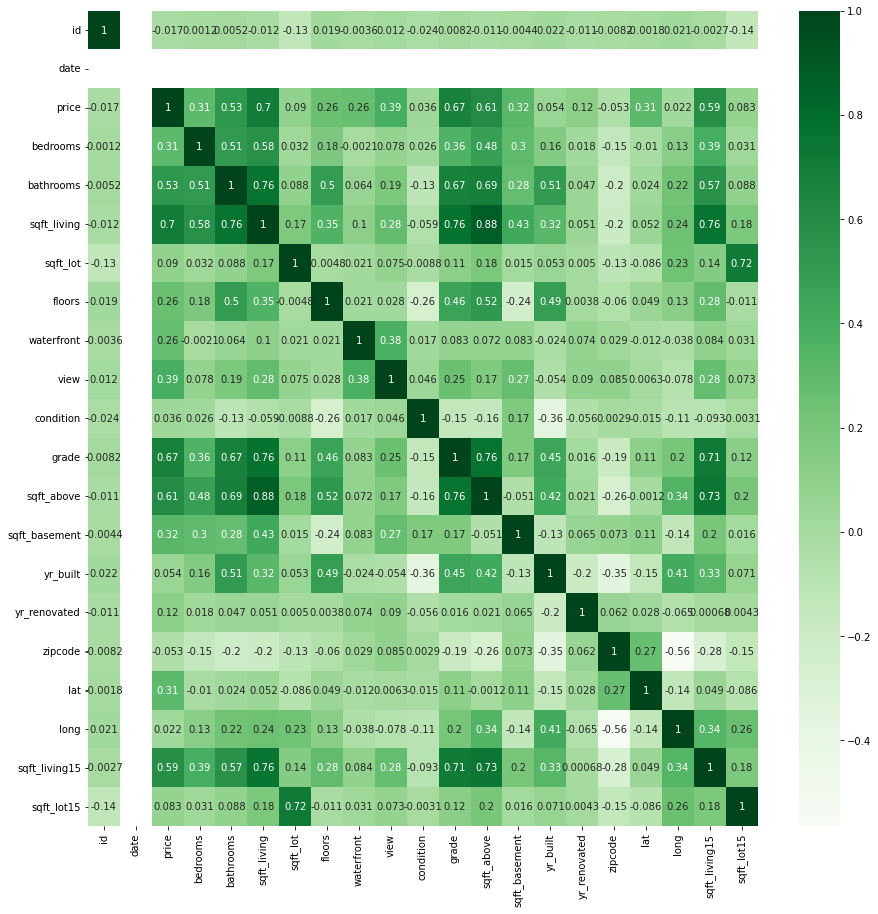

In [88]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat(), annot=True,cmap='Greens');


In [90]:
#fuction to retrive the correlated data at a certain threshold
def getCorrelationFeatures(corrdata, threshold):
    feature = []
    value = []
    
# If the absolute value of the correlated feature is above 
# the given threshold, the value and the feature will be appended 
# to a new list
    
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index]) > threshold:
            feature.append(index)
            value.append(corrdata[index])
    df = pd.DataFrame(data = value, index = feature, columns = ['Corr Value'])
    return df

In [91]:
#Setting the threshold
threshold = 0.5

#The correlated features for price greater than 50%
corr_value = getCorrelationFeatures(corrmat()['price'], threshold)
corr_value

,Corr Value
price,1.000000
bathrooms,0.525906
sqft_living,0.701917
grade,0.667951
sqft_above,0.605368
sqft_living15,0.585241


In [92]:
corr_value.index

Index(['price', 'bathrooms', 'sqft_living', 'grade', 'sqft_above',
       'sqft_living15'],
      dtype='object')

In [94]:
#Creating a dataframe from the indices of the corr value
correlated_data = data[corr_value.index]
correlated_data.head()

,price,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,221900.0,1.00,1180,7,1180,1340
1,538000.0,2.25,2570,7,2170,1690
2,180000.0,1.00,770,6,770,2720
3,604000.0,3.00,1960,7,1050,1360
4,510000.0,2.00,1680,8,1680,1800


<AxesSubplot:>

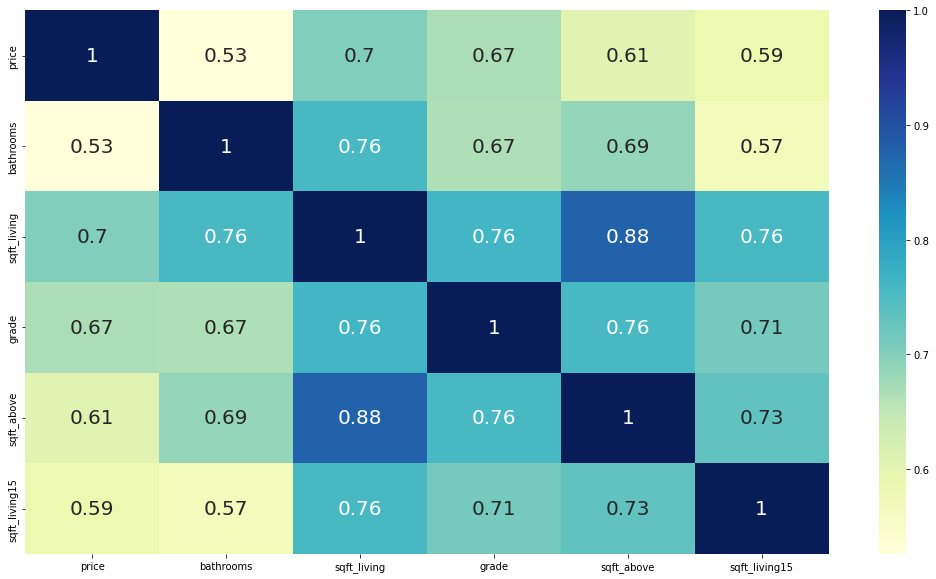

In [95]:
#Creating Subplots
plt.subplots(figsize = (18,10))
#Heatmap showing the correlation between correlated features in the testing dataframe
sns.heatmap(correlated_data.corr(), annot = True, annot_kws = {'size':20}, cmap="YlGnBu")

More visualization for showing the factors that affect price

Text(0.5, 1.0, 'Price vs Square Feet')

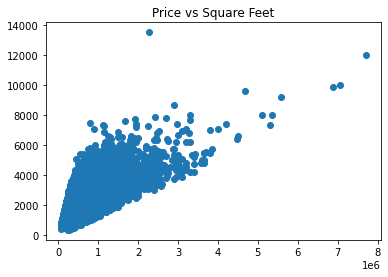

In [17]:
plt.scatter(data.price,data.sqft_living)
plt.title("Price vs Square Feet")

Text(0.5, 1.0, 'Price vs Location of the area')

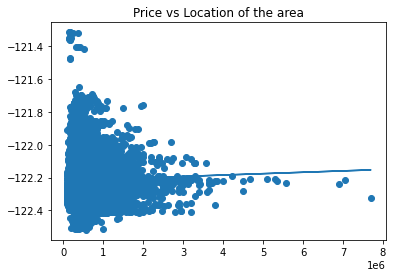

In [103]:
x=data.price
y=data.long
plt.scatter(data.price,data.long)
a, b = np.polyfit(data.price, data.long, 1)
plt.plot(x, a*x+b)
plt.title("Price vs Location of the area")

Text(0.5, 1.0, 'Latitude vs Price')

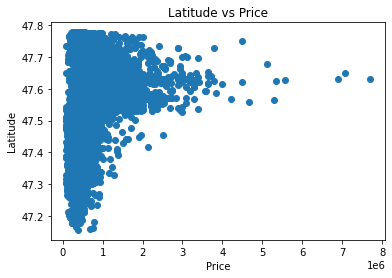

In [105]:
# plot
plt.scatter(data.price,data.lat)
plt.xlabel("Price")
plt.ylabel('Latitude')
plt.title("Latitude vs Price")

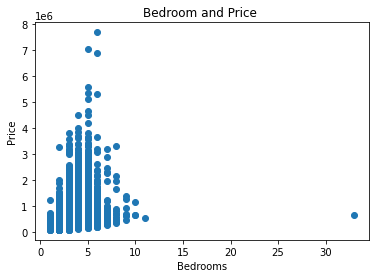

In [98]:
plt.scatter(data.bedrooms,data.price)
plt.title("Bedroom and Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()


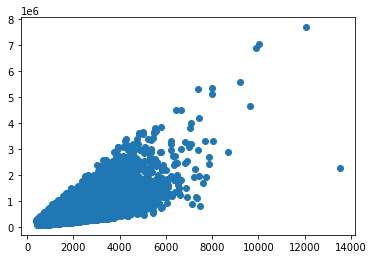

In [107]:
plt.scatter((data['sqft_living']),data['price'])

Text(0.5, 1.0, 'Waterfront vs Price ( 0= no waterfront)')

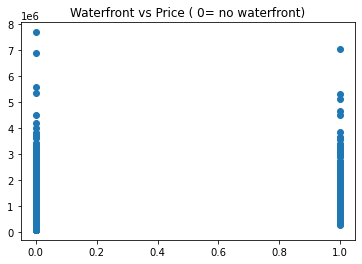

In [108]:
plt.scatter(data.waterfront,data.price)
plt.title("Waterfront vs Price ( 0= no waterfront)")

<AxesSubplot:>

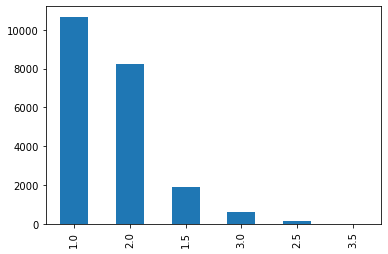

In [23]:
data.floors.value_counts().plot(kind='bar')

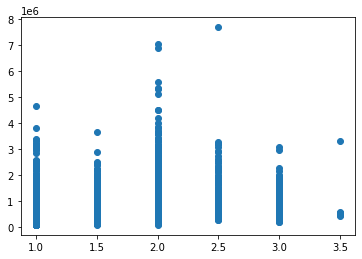

In [24]:
plt.scatter(data.floors,data.price)

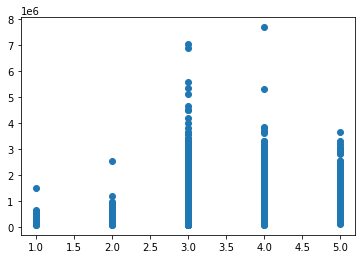

In [25]:
plt.scatter(data.condition,data.price)

Text(0.5, 1.0, 'Which is the pricey location by zipcode?')

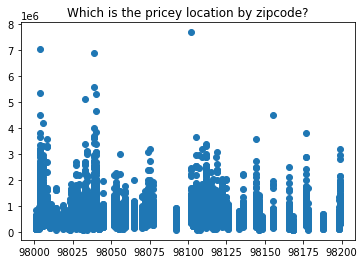

In [26]:
plt.scatter(data.zipcode,data.price)
plt.title("Which is the pricey location by zipcode?")

## Model

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [28]:
reg = LinearRegression()

In [37]:
train1 = data.drop(['id', 'price'],axis=1)

In [115]:
main_y = data['price']#price predictor
# Now we know that prices are to be predicted , hence we set labels (output) as price columns and we also convert dates to 1’s and 0’s so that it doesn’t influence our data much .
# We use 0 for houses which are new that is built after 2014
conv_dates = [1 if values == 2014 else 0 for values in data.date ]
data['date'] = conv_dates
train1 = data.drop(['id', 'price'],axis=1)
train1.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [122]:
# My train data is 90% and 10% of the data ratio , 
# and I randomized the splitting of data by using random_state.
x_train , x_test , y_train , y_test = train_test_split(train1 , main_y , test_size = 0.10,random_state =2)

In [123]:
reg.fit(x_train,y_train)

LinearRegression()

In [131]:
reg.score(x_test,y_test)

0.6763909896316971

In [132]:
y_pred1 = reg.predict(x_test)
y_pred1

array([183721.16058102, 490369.36702322, 571439.86146565, ...,
       870802.1199999 , 455451.09681782, 182559.406516  ])

After fitting our data to the model we can check the score of our data ie , prediction. in this case the prediction is 67%.The accuracy of the model is low. However we can imporve it by using gradient boosting regression.

# Improving our gradient
1. We first import the library from sklearn ( trust me , it is the best library for all statistical related models)
2. We create a variable where we define our gradient boosting regressor and set parameters to it , here
* n_estimator — The number of boosting stages to perform. We should not set it too high which would overfit our model.
* max_depth — The depth of the tree node.
* learning_rate — Rate of learning the data.
* loss — loss function to be optimized. ‘ls’ refers to least squares regression
* minimum sample split — Number of sample to be split for learning the data



In [45]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

original_params={'n_estimators': 400, 'max_depth' : 5,' min_samples_split': 2,
          'learning_rate' : 0.1, 'loss ':'ls'}
params = dict(original_params)


In [46]:
clf.fit(x_train, y_train)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


GradientBoostingRegressor(loss='ls', max_depth=5, n_estimators=400)

In [47]:
clf.score(x_test,y_test)

0.9159472588142226

3. We then fit our training data into the gradient boosting model and check for accuracy
4. We get an accuracy of 91.59% 

In [135]:
y_pred2 = reg.predict(x_test)
y_pred2

array([183721.16058102, 490369.36702322, 571439.86146565, ...,
       870802.1199999 , 455451.09681782, 182559.406516  ])

In [134]:
# Note the difference in argument order
model = sm.OLS(y_train, x_train).fit() ## sm.OLS(output, input)
predictions = model.predict(x_test)

# Print out the statistics
model.summary()

C:\Users\ADMIN\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.907
Model:                            OLS   Adj. R-squared (uncentered):              0.907
Method:                 Least Squares   F-statistic:                          1.057e+04
Date:                Tue, 13 Dec 2022   Prob (F-statistic):                        0.00
Time:                        16:27:18   Log-Likelihood:                     -2.6461e+05
No. Observations:               19437   AIC:                                  5.293e+05
Df Residuals:                   19419   BIC:                                  5.294e+05
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
date                   0          0        nan        nan           0           0
bedrooms      -3.321e+04   1955.071    -16.985      0.000    -3.7e+04   -2.94e+04
bathrooms      4.244e+04   3381.504     12.551      0.000    3.58e+04    4.91e+04
sqft_living      99.0992     18.309      5.413      0.000      63.212     134.986
sqft_lot          0.1496      0.051      2.958      0.003       0.050       0.249
floors         7179.5091   3689.334      1.946      0.052     -51.903    1.44e+04
waterfront     6.509e+05   1.86e+04     34.936      0.000    6.14e+05    6.87e+05
view           4.985e+04   2189.035     22.775      0.000    4.56e+04    5.41e+04
condition       2.78e+04   2409.221     11.537      0.000    2.31e+04    3.25e+04
grade          9.693e+04   2231.764     43.433      0.000    9.26e+04    1.01e+05
sqft_above       71.9483     18.306      3.930      0.000      36.068     107.829
sqft_basement    43.3682     18.146      2.390      0.017       7.800      78.936
yr_built      -2574.0266     69.775    -36.890      0.000   -2710.792   -2437.261
yr_renovated     24.4798      4.106      5.961      0.000      16.431      32.529
zipcode        -513.4677     18.547    -27.685      0.000    -549.821    -477.114
lat            5.988e+05   1.11e+04     53.887      0.000    5.77e+05    6.21e+05
long          -2.148e+05   1.36e+04    -15.820      0.000   -2.41e+05   -1.88e+05
sqft_living15    27.5769      3.517      7.842      0.000      20.684      34.470
sqft_lot15       -0.3338      0.077     -4.322      0.000      -0.485      -0.182
==============================================================================
Omnibus:                    15430.920   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1207073.681
Skew:                           3.261   Prob(JB):                         0.00
Kurtosis:                      41.051   Cond. No.                          inf
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""